## Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as skm
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score
import ISLP
from ISLP.svm import plot as plot_svm
from sklearn.model_selection import GridSearchCV
import pandas as pd


## 9.5

Generating data

Let me first generate some data set

In [3]:
np.random.seed(42)
n = 2*500
p = 2
rng = np.random.default_rng(10)
x1 = rng.uniform(size = n) - 0.4
x2 = rng.uniform(size = n) - 0.4
X = np.stack([x1, x2], axis = 1)
y  = x1**2 - x2**2 > 0.1**2

As you can see, the sample size is increased. In addition, `x1` and `x2` coordinates were shifted by 0.4 instead of 0.5. This was done to make data set little less symmetric, so that logistic regression predictions are non-trivial

Here is the plot of the original points. As you can see, two classes are actually located in three different regions, so it does not seem trivial to seperate them

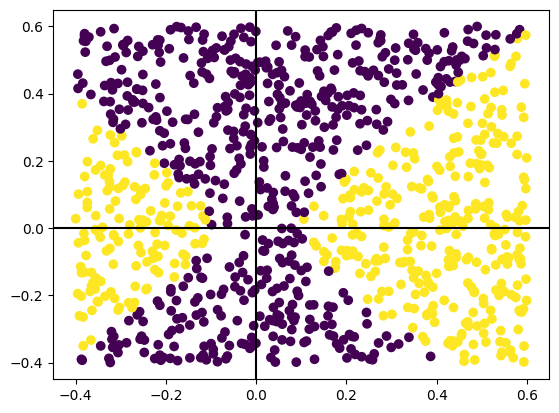

In [4]:
2
plt.scatter(x1, x2, c = y)
plt.axvline(0, color = "black")
plt.axhline(0, color = "black")

It is convenient to define some plot functions to reduce the code repetition

In [5]:
# Plots scatter plot with f1 score
def plotOne(X, y, predictions, ax, testQ = True):
    ax.scatter(X[:, 0], X[:,1], c = predictions)
    type = "Test" if testQ else "Train"
    ax.set_title("{:s}: f1= {:.2f}".format(type, f1_score(y, predictions)))
    ax.axvline(0, dashes = [2, 2], color = "black")
    ax.axhline(0, dashes = [2, 2], color = "black")

# Plots both train and test
def genPlot(model, ax1 = None, ax2 = None, X = X, y=y, random_state = 42, superTier = None):
    if ax1 is None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = random_state)
    model.fit(X_train, y_train)
    # Train
    predictions = model.predict(X_train)
    plotOne(X_train, y_train, predictions, ax1, testQ=False)
    # Test
    predictions = model.predict(X_test)
    plotOne(X_test, y_test, predictions, ax2, testQ=True)
    #
    if superTier is not None:
        plt.suptitle(superTier)
    plt.show()


Let me first try Logostic regression

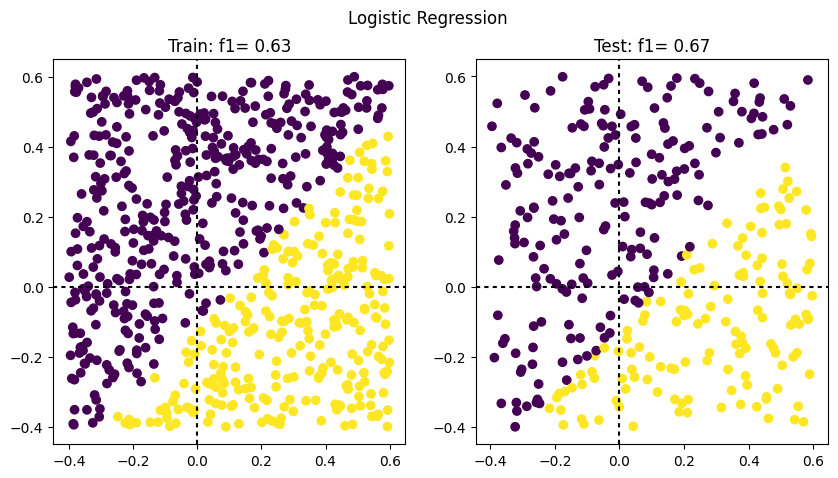

In [6]:
model = LogisticRegression()
genPlot(model, superTier="Logistic Regression")

As you can see, there is only one line that separates two classes of the predictions. It makes sense since our model is linear

When some extra (non-linear) variables the prediction accuracy is much better

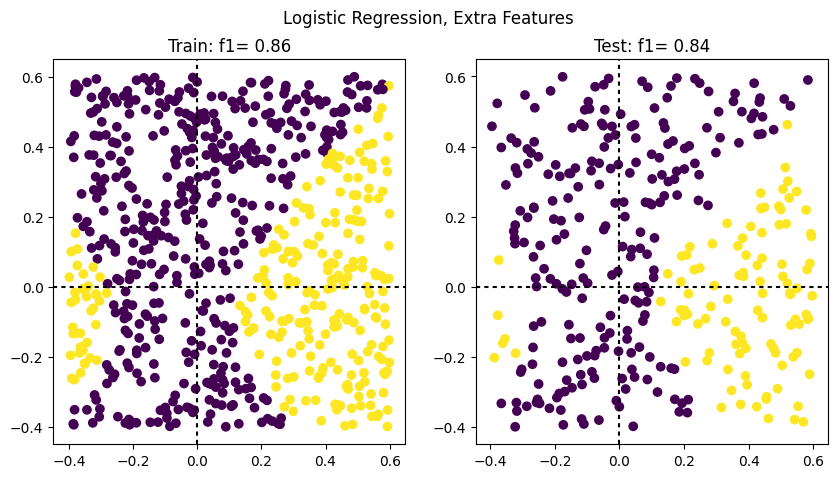

In [7]:
x1_2 = x1**2
x2_2 = x2**2
x1_x2 = x1*x2
log_x2 = np.log(x2+1)
X_full = np.stack([x1, x2, x1_2, x2_2, x1_x2, log_x2], axis = 1)
model = LogisticRegression()
genPlot(model, X = X_full, superTier="Logistic Regression, Extra Features")


Results of the Support Vector Classifier with linear kernel are not very impressive: we again have only one separaring line. This coild be expected since the model is still linear

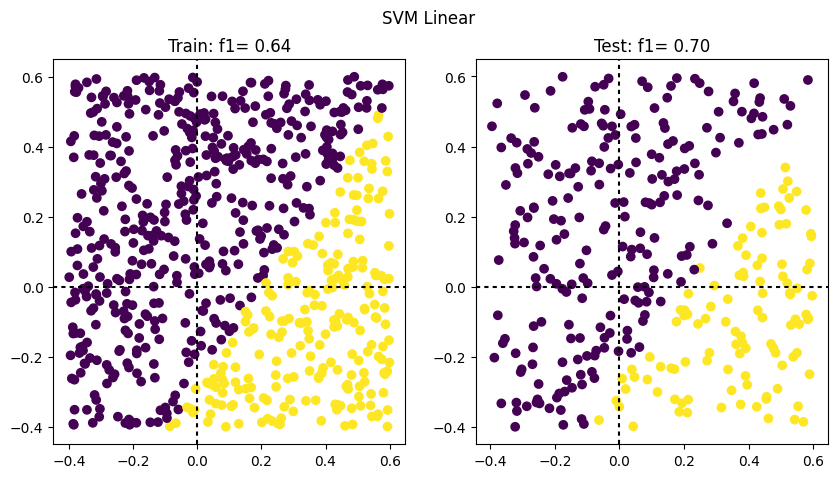

In [8]:
svm_linear = svm.SVC(kernel="linear", C=0.1)
genPlot(svm_linear, superTier="SVM Linear")

Polynomial (quadratic) kernel, on the other hand gives very nice results:

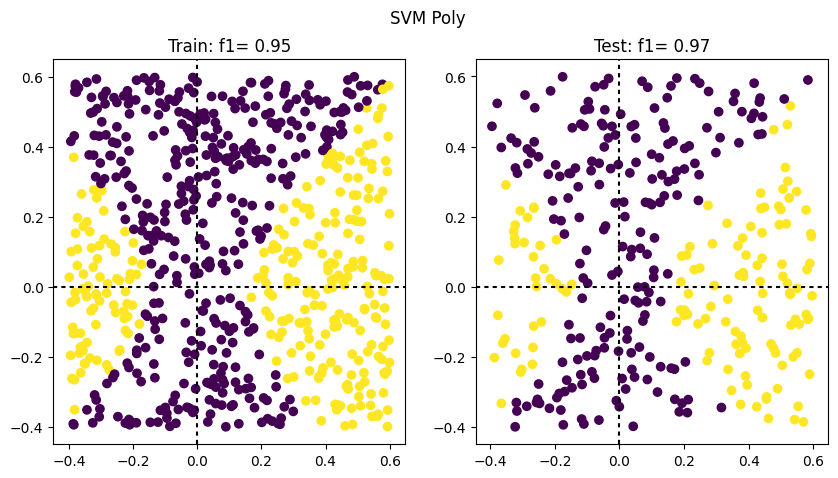

In [9]:
svm_poly = svm.SVC(kernel="poly", degree=2)
genPlot(svm_poly, superTier="SVM Poly")


This is not surprising since the separation line in our data set was indeed quadratic

GridSearch also votes for quadratic kernel

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5]}
svm_model = svm.SVC(kernel = "poly")
svm_grid = GridSearchCV(svm_model, param_grid, cv = 5)
model = svm_grid.fit(X, y)
svm_grid.best_params_

{'C': 100, 'degree': 2}

Found by this search best estimator shows perfect results

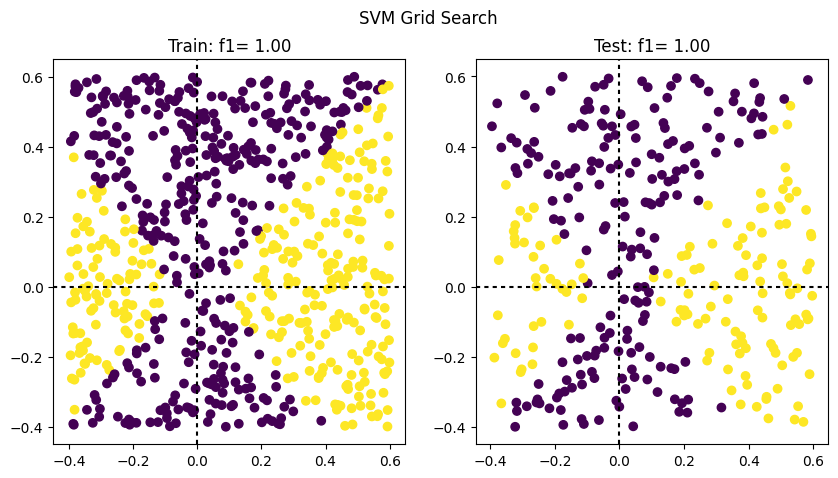

In [11]:
genPlot(svm_grid.best_estimator_, superTier="SVM Grid Search")